In [70]:
import numpy as np
import pandas as pd

import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from statsmodels.stats.weightstats import DescrStatsW
from scipy import stats
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')
img_path = 'S:\\123\\333\\'

In [71]:
os.chdir(img_path)
np.random.seed(4)
files = [f for f in os.listdir() if f.endswith('.jpg')]
n_samples = 250
sample = np.random.choice(files,n_samples)
print(len(sample))
images_green = np.array([cv2.split(cv2.imread(im))[1] for im in sample])

250


2)	Провести декомпозицію каналу зеленого кольору тестових зображень з використанням методу головних компонент (PCA):

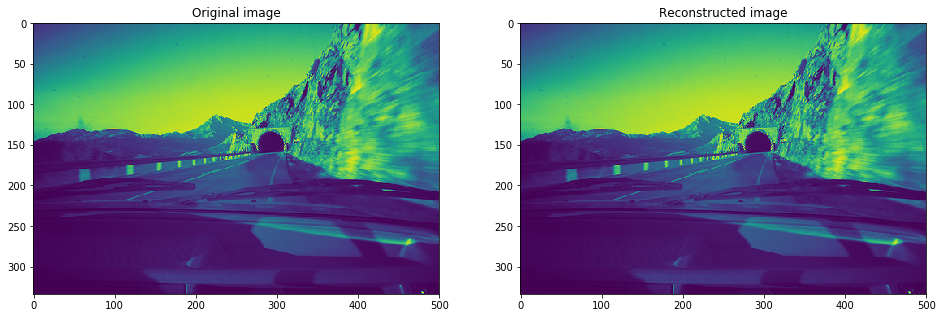

In [72]:
def get_pca(im,c=None,trans=True):
    pca = PCA(n_components=c,svd_solver='full')
    comp = pca.fit_transform(im)
    if trans:
        return pca.inverse_transform(comp)
    return pca,comp

reconstructed = get_pca(images_green[0])

plt.figure(figsize=(16,16))
plt.subplot(121)
plt.title('Original image')
plt.imshow(images_green[0])

plt.subplot(122)
plt.title('Reconstructed image')
plt.imshow(reconstructed);

Для каналу зеленого кольору тестових зображень обчислити наступні характеристики розподілу значень яскравості пікселів:

Впорядкувати отримані компоненти вихідного зображення в порядку зменшення значень сингулярних чисел (від найбільшого S_min до найменшого S_max значення);

In [73]:
np.set_printoptions(suppress=True)
pca,c_im = get_pca(sample_images_green[0],trans=False)
pca.singular_values_

array([26763.2174519 ,  9068.53648762,  5562.50899884,  3922.26403626,
        3324.41581467,  2859.44436995,  2364.43684549,  2350.85458442,
        2005.18042704,  1927.59003666,  1683.79437916,  1629.20862417,
        1509.29665188,  1431.05247091,  1347.34727159,  1293.31455247,
        1258.71856153,  1180.6647606 ,  1123.42098295,  1087.99023456,
        1034.03355491,  1007.07824189,   966.6517306 ,   932.82938257,
         901.19635577,   878.11797555,   853.23880213,   813.03840655,
         797.79692411,   776.48075401,   767.70393603,   754.54701595,
         739.40466533,   722.8280611 ,   714.30480283,   706.48139345,
         695.03021523,   674.19438212,   659.56051256,   640.15841783,
         615.34674185,   609.56046738,   602.58671328,   592.40396103,
         584.50561176,   578.37410458,   570.86603592,   564.98740339,
         556.40565085,   553.52696768,   527.5053471 ,   522.61559444,
         521.0671781 ,   509.33398079,   488.65002102,   486.63937405,
      

	Провести реконструкцію зображення при використанні лише частки (α%) компонентів розкладу, що характеризуються відмінними від нуля сингулярними числами (s_i≠0).
    Розглянути випадок, коли α змінюється від α_min=10% до α_max=100% з кроком ∆_α=10%.
    Порівняти вихідне та реконструйоване зображення за показником середньоквадратичного відхилення (MSE).

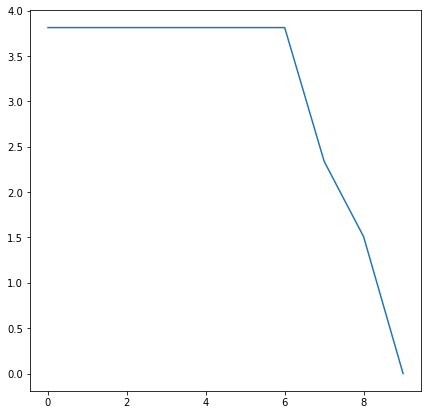

In [74]:
mse = np.array([mean_squared_error(images_green[0],get_pca(images_green[0],c=alpha*0.1 if alpha<10 else None)) for alpha in range(1,11)])/len(images_green[0])
plt.figure(figsize=(7,7))
plt.plot(mse)

No handles with labels found to put in legend.


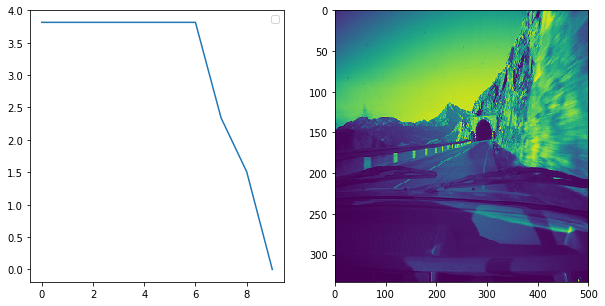

In [75]:
plt.figure(figsize=(10,5))

plt.subplot(121,)
plt.plot(mse)
plt.legend()

plt.subplot(122)
plt.imshow(sample_images_green[0],aspect='auto');

	Побудувати графіки залежності (MSE) ̅(α), де (MSE) ̅- значення середньо-квадратичного відхилення між 
    вихідним та реконструйованим зображеннями, усереднені по тестовому пакету;

In [76]:
full_mse = np.zeros(1)
for im in images_green:
    full_mse = np.add(full_mse,np.array([mean_squared_error(im,get_pca(im,c=alpha*0.1 if alpha<10 else None)) for alpha in range(1,11)])/len(im))

In [77]:
full_mse = full_mse/len(images_green)

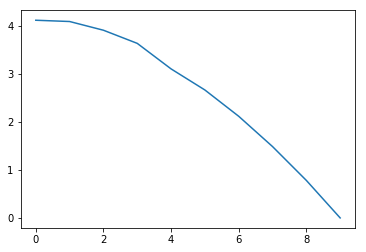

In [78]:
plt.plot(full_mse)

Провести моделювання каналу зеленого кольору тестових зображень з використанням марківських ланцюгів першого порядку M_1:

	Отримати стохастичну матрицю для каналу зеленого кольору при обробці пікселів (згідно номеру студента в списку групи, за модулем кількості варіантів):
	По горизонталі, зліва направо – M_1^→ (I_(x,y),I_(x+1,y) );
	По горизонталі, справа наліво – M_1^← (I_(x,y),I_(x-1,y) );
	По вертикалі, зверху вниз – M_1^↓ (I_(x,y),I_(x,y+1) );
	По вертикалі, знизу вгору – M_1^↑ (I_(x,y),I_(x,y-1) );
	По головній діагоналі – M_1^↘ (I_(x,y),I_(x+1,y+1) );
	По головній діагоналі – M_1^↖ (I_(x,y),I_(x-1,y-1) );
	По побічній діагоналі – M_1^↙ (I_(x,y),I_(x-1,y+1) );
	По побічній діагоналі – M_1^↗ (I_(x,y),I_(x+1,y-1) );
	В протоколі роботи графічно показати вид марківського ланцюга для діапазону яскравості пікселів I_(x,y)∈[i;i×10], де i- номеру студента в списку групи;


In [85]:
def image_iteration_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w):
            val_1 = image[h - i - 2][j]
            val_2 = image[h - i - 1][j]
            matrix[val_1][val_2] += 1

m = np.zeros((256,256))
for im in images_green:
    image_iteration_down_up(im,m)
m = m/m.sum(axis=1)[:,np.newaxis]

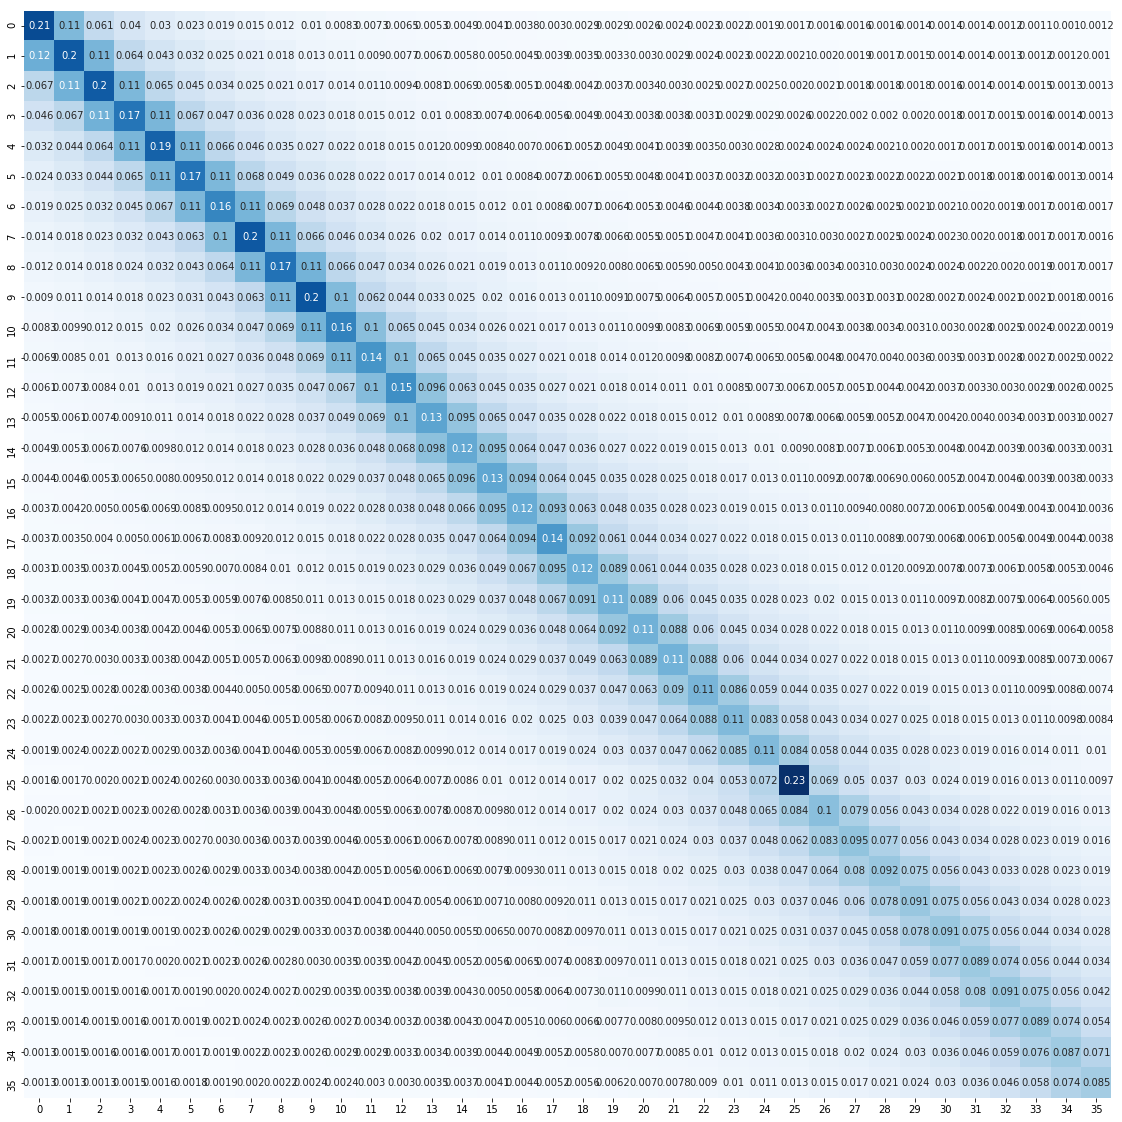

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(m[4:4*10,4:4*10],square=True,cbar=False,cmap='Blues',annot=True)
plt.show()

Для отриманих марківських ланцюгів перевірити виконання властивості регулярності та рекурентності після проходження 5 ітерацій роботи.

In [81]:
reg = np.linalg.matrix_power(m, 5)
reg = (reg <= 0).sum() == 0
reg

True

In [82]:
def recurrence_check(matrix, k):
    new_matrix = np.linalg.matrix_power(matrix, k)
    for i in range(new_matrix.shape[0]):
        if new_matrix[~i, i] == 0:
            return False
        return True


In [83]:
recurrent = recurrence_check(m, k = 5)

In [84]:
recurrent

True